In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [4]:
# hospital = pd.read_csv('./hospital.csv', index_col=0, parse_dates=True)
# hospital.head()

# hospital.plot(subplots=True);

# model = ARIMA(hospital['wait_times_hrs'], order=(3,0, 1), exog=hospital['nurse_count'])
# results = model.fit()
# print(results.summary())

# f_exog = [10, 1, 20, 5, 30]

# fcast = results.forecast(steps=5, exog=f_exog)

# fcast

In [5]:
utilData = pd.read_csv('./Util_Run1.csv')
utilData.shape

(2674, 6)

In [6]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq
0,604872,4612865,165000000,0,31,600000
1,675,28712,275000000,0,4,200000
2,1191888,12624777,413000000,0,8,200000
3,773492,8196989,275000000,0,9,300000
4,1144,57890,206000000,0,7,300000


In [7]:
utilData['memLoad'] = utilData['memUse']/utilData['memTot']

In [8]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad
0,604872,4612865,165000000,0,31,600000,0.131127
1,675,28712,275000000,0,4,200000,0.023509
2,1191888,12624777,413000000,0,8,200000,0.094409
3,773492,8196989,275000000,0,9,300000,0.094363
4,1144,57890,206000000,0,7,300000,0.019762


In [9]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad
0,604872,4612865,165000000,0,31,600000,0.131127
1,675,28712,275000000,0,4,200000,0.023509
2,1191888,12624777,413000000,0,8,200000,0.094409
3,773492,8196989,275000000,0,9,300000,0.094363
4,1144,57890,206000000,0,7,300000,0.019762


In [10]:
utilData['cpuScore'] = utilData['cpuload']*utilData['cpufreq']/1400000

In [11]:
utilData.head()
utilData['cpuF'] = utilData['cpufreq']/1000000


In [12]:
model = ARIMA(utilData['cpuF'], order=(4,0, 1), exog=utilData['cpuload'])

In [13]:
results = model.fit()
print(results.summary())

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                 2674
Model:                 ARIMA(4, 0, 1)   Log Likelihood                3692.559
Date:                Wed, 07 Jun 2023   AIC                          -7369.118
Time:                        12:33:56   BIC                          -7321.988
Sample:                             0   HQIC                         -7352.066
                               - 2674                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2004      0.002     90.848      0.000       0.196       0.205
cpuload        0.0120   6.65e-05    179.880      0.000       0.012       0.012
ar.L1       6.881e-16      0.006   1.16e-13      1.0

In [14]:
cpufreq_exp = [81.4, 20.0, 50.0, 10.0, 0.0]

In [15]:
load_forecast=results.forecast(steps=5, exog=cpufreq_exp)

In [16]:
load_forecast,cpufreq_exp

(2674    1.174676
 2675    0.439803
 2676    0.798862
 2677    0.320117
 2678    0.200431
 Name: predicted_mean, dtype: float64,
 [81.4, 20.0, 50.0, 10.0, 0.0])

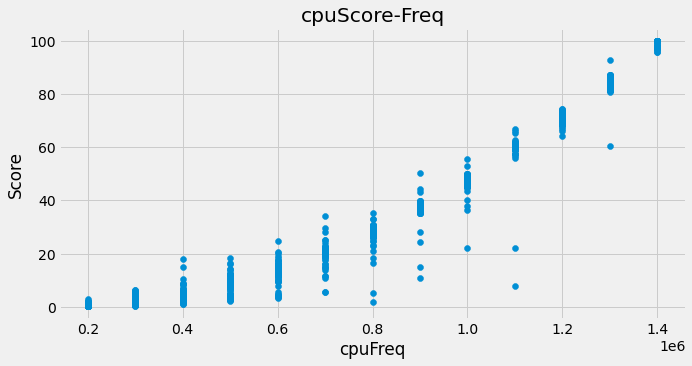

In [17]:
plt.scatter(utilData['cpufreq'].to_numpy(),utilData['cpuScore'].to_numpy())
plt.title("cpuScore-Freq")
plt.xlabel("cpuFreq")
plt.ylabel("Score")
plt.show()

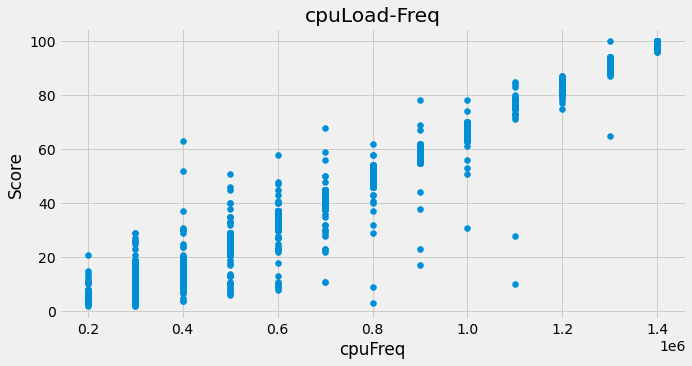

In [18]:
plt.scatter(utilData['cpufreq'].to_numpy(),utilData['cpuload'].to_numpy())
plt.title("cpuLoad-Freq")
plt.xlabel("cpuFreq")
plt.ylabel("Score")
plt.show()

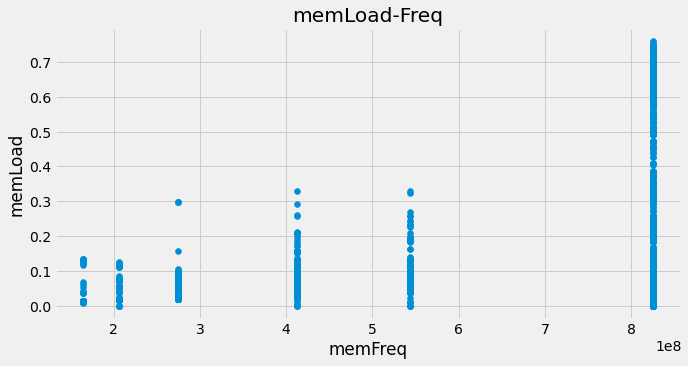

In [19]:
plt.scatter(utilData['memfreq'].to_numpy(),utilData['memLoad'].to_numpy())
plt.title("memLoad-Freq")
plt.xlabel("memFreq")
plt.ylabel("memLoad")
plt.show()

In [20]:
utilData['memScore'] = utilData['memLoad']*utilData['memfreq']/825000000


In [21]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad,cpuScore,cpuF,memScore
0,604872,4612865,165000000,0,31,600000,0.131127,13.285714,0.6,0.026225
1,675,28712,275000000,0,4,200000,0.023509,0.571429,0.2,0.007836
2,1191888,12624777,413000000,0,8,200000,0.094409,1.142857,0.2,0.047262
3,773492,8196989,275000000,0,9,300000,0.094363,1.928571,0.3,0.031454
4,1144,57890,206000000,0,7,300000,0.019762,1.500000,0.3,0.004934


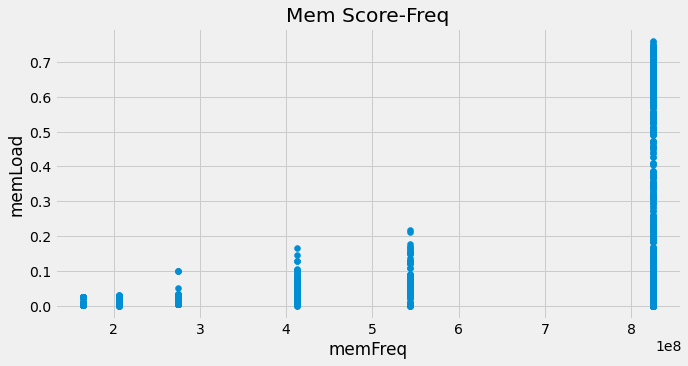

In [22]:
plt.scatter(utilData['memfreq'].to_numpy(),utilData['memScore'].to_numpy())
plt.title("Mem Score-Freq")
plt.xlabel("memFreq")
plt.ylabel("memLoad")
plt.show()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [24]:
from pmdarima.arima import auto_arima